In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from benchmarks.runs.exploring_utils import RunAnalyser, adaptive_filter, non_adaptive_filter, model_filter
import re

In [2]:
run_path = '../'
test_name = 'Wave_sobol'
test_path = os.path.join(run_path, test_name)

In [3]:
runs = sorted([m for m in os.listdir(test_path) if os.path.isdir(os.path.join(test_path, m))])
analyser = RunAnalyser(runs, test_path)

<Figure size 700x700 with 0 Axes>

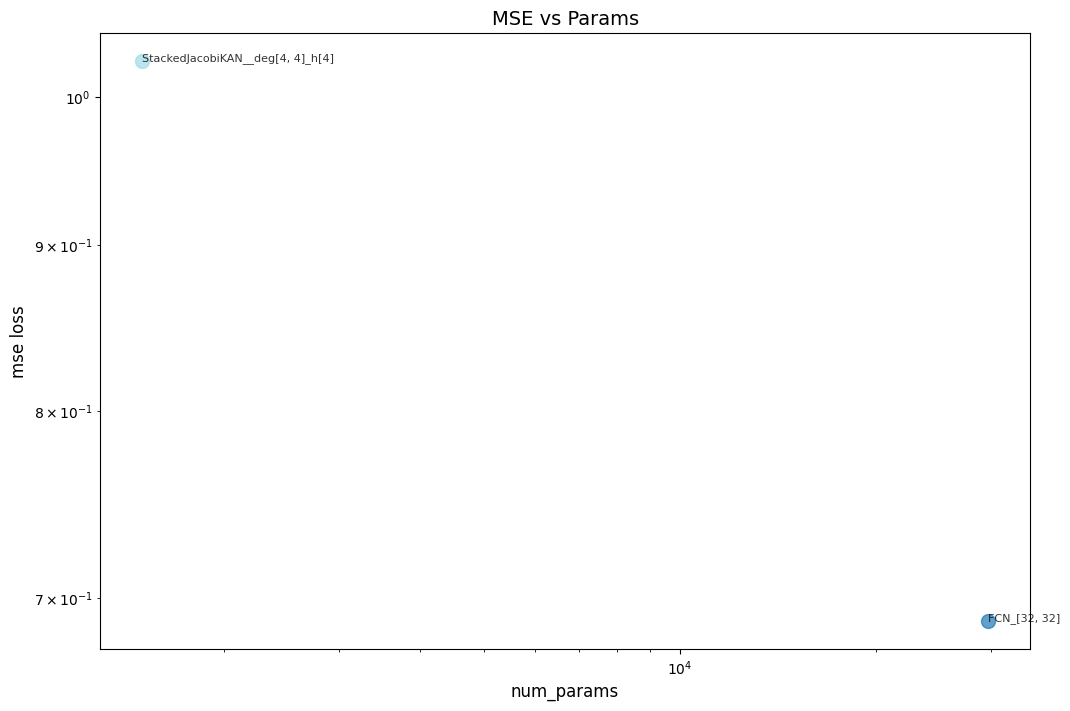

In [4]:
analyser.plot_mse_over_params()

<Figure size 700x700 with 0 Axes>

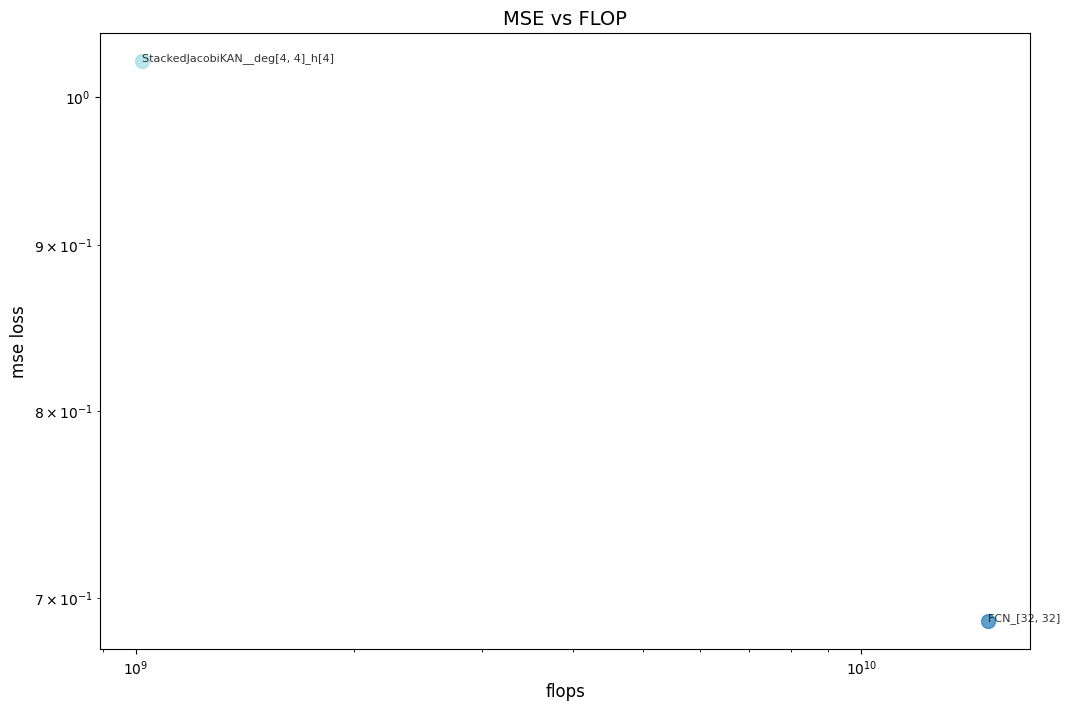

In [5]:
analyser.plot_mse_over_flops()

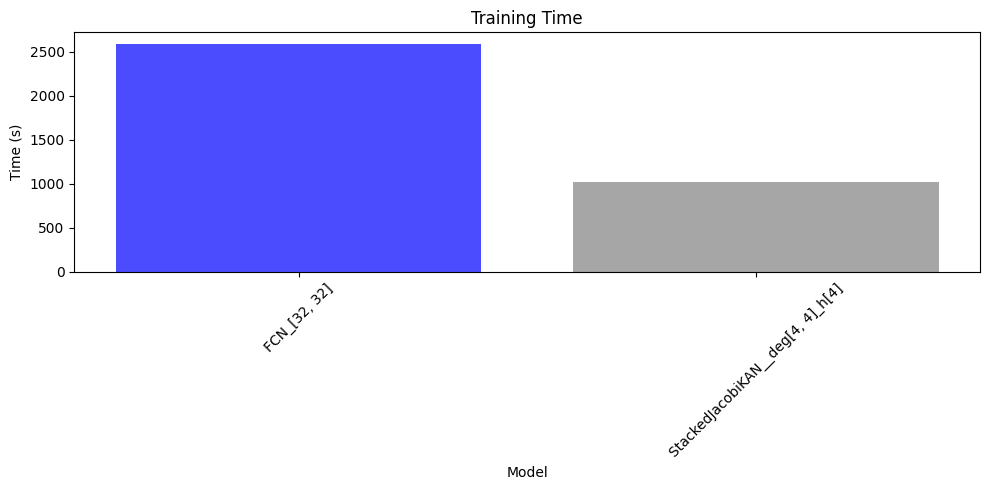

In [6]:
analyser.plot_training_times(filter=lambda x: 'Stacked' in x or 'FCN' in x)

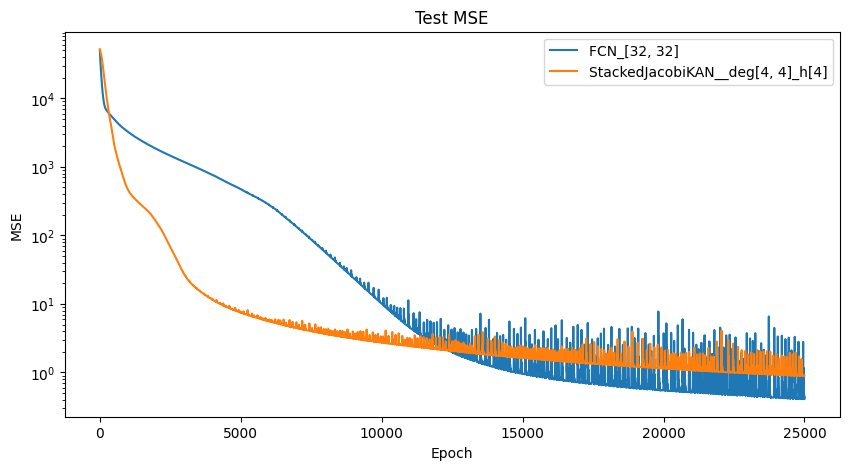

In [7]:
analyser.plot_mses()

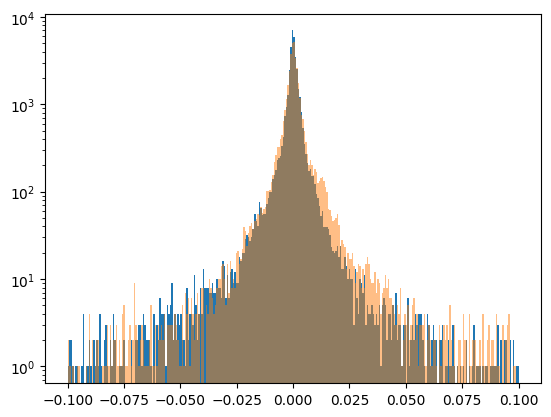

In [ ]:
with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/{test_name}/StackedJacobiKAN__deg[4, 4]_h[4]/test_25000.npy', 'rb') as f:
    pred_jkan = np.load(f).reshape(200, 200, -1)
with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/{test_name}/FCN_[32, 32]/test_25000.npy', 'rb') as f:
    pred_fcn = np.load(f).reshape(200, 200, -1)
with open(f'/vol/bitbucket/ss7921/FBPINNs/benchmarks/runs/{test_name}/StackedJacobiKAN__deg[4, 4]_h[4]/test_exact.npy', 'rb') as f:
    exact = np.load(f).reshape(200, 200, -1)

exact.shape, pred_jkan.shape, pred_fcn.shape

rae = lambda exact, pred: (np.abs(exact - pred) / (np.abs(exact)))

slice=0

rE = lambda exact, pred: ((exact - pred) / (np.abs(exact)))
re_fcn = rE(exact[1:199, 1:199, slice], pred_fcn[1:199, 1:199, slice])
re_jkan = rE(exact[1:199, 1:199, slice], pred_jkan[1:199, 1:199, slice])
plt.hist(re_fcn.flatten(), bins=300, label='FCN', range=(-0.1, 0.1))
plt.hist(re_jkan.flatten(), bins=300, label='Jacobi KAN', alpha=0.5, range=(-0.1, 0.1))
plt.yscale('log')

/tmp/ipykernel_1146488/729268031.py:10: RuntimeWarning: invalid value encountered in divide
  rae = lambda exact, pred: (np.abs(exact - pred) / (np.abs(exact)))


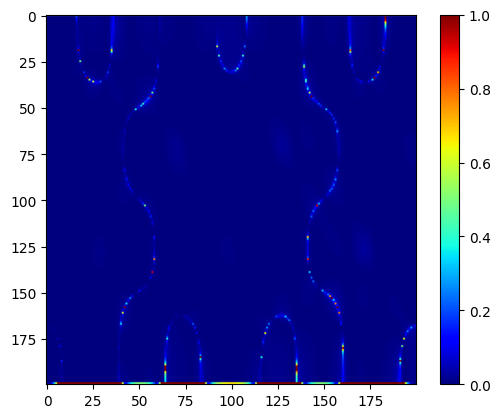

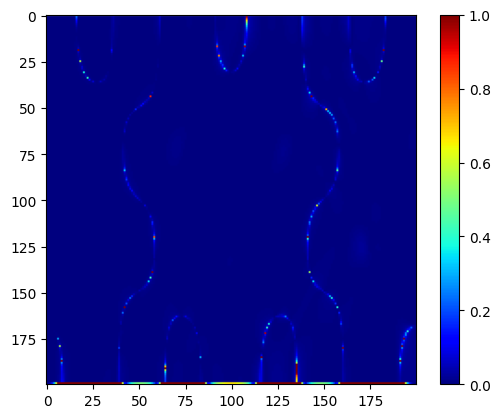

In [23]:
plt.imshow(rae(exact, pred_jkan), cmap='jet', vmax=1)
plt.colorbar()
plt.show()
plt.imshow(rae(exact, pred_fcn), cmap='jet', vmax=1)
plt.colorbar()
plt.show()